## 1. Importing Required Libraries

Importing all necessary libraries for:
- Data manipulation and visualization (`numpy`, `pandas`, `matplotlib`, `seaborn`)
- Machine learning modeling and preprocessing (`scikit-learn`, `xgboost`)
- Model evaluation and export (`r2_score`, `pickle`, `joblib`)
- Suppressing warnings and setting consistent plot styles for analysis


In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Exporting models
from joblib import dump
import pickle

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Seaborn style
sns.set_theme(style="darkgrid", palette="muted")


## 2. Uploading and Loading the Dataset

Upload the `Train.csv` file using Google Colab’s file upload utility and load it into a pandas DataFrame.  
Displays the shape of the dataset and previews the first few rows to verify successful import.


In [ ]:
# Upload Train.csv
from google.colab import files
uploaded = files.upload()

# Confirm the file and load it
df = pd.read_csv("Train.csv")
print("Shape of dataset:", df.shape)
df.head()



Saving Train.csv to Train.csv
Shape of dataset: (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 3. Dataset Overview and Missing Value Analysis

Performing initial dataset inspection by:
- Displaying general information and data types
- Identifying missing values in each column
- Viewing summary statistics of numerical features
- Analyzing value distributions for all key categorical columns


In [ ]:
# Display dataset info
print("Dataset Info:")
print(df.info())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Describe numerical columns
print("\nSummary statistics:")
print(df.describe())

# Value counts for categorical features
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

Missing values per column

## 4. Exploratory Data Analysis (EDA)

Visualizing the dataset to understand distributions and relationships:

- **Distribution of Sales**: Histogram of `Item_Outlet_Sales` to observe skewness
- **Sales by Outlet Type**: Boxplot showing how sales vary across different outlet types
- **Average Sales by Item Type**: Bar plot showing mean sales per item category
- **Outlet Counts**: Count plots for `Outlet_Type` and `Outlet_Size` to view frequency
- **Correlation Heatmap**: Visual correlation matrix for numerical features to detect multicollinearity


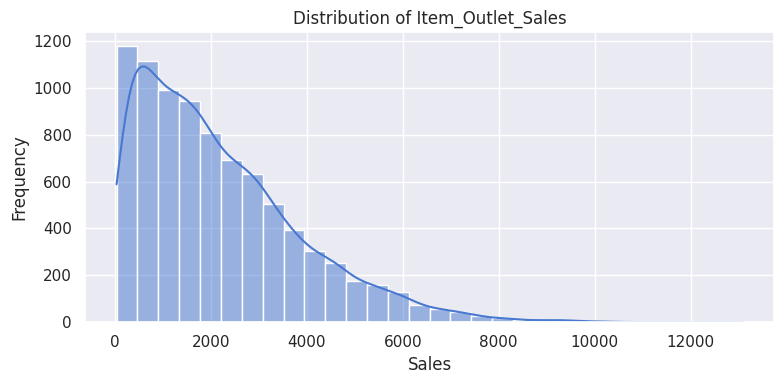

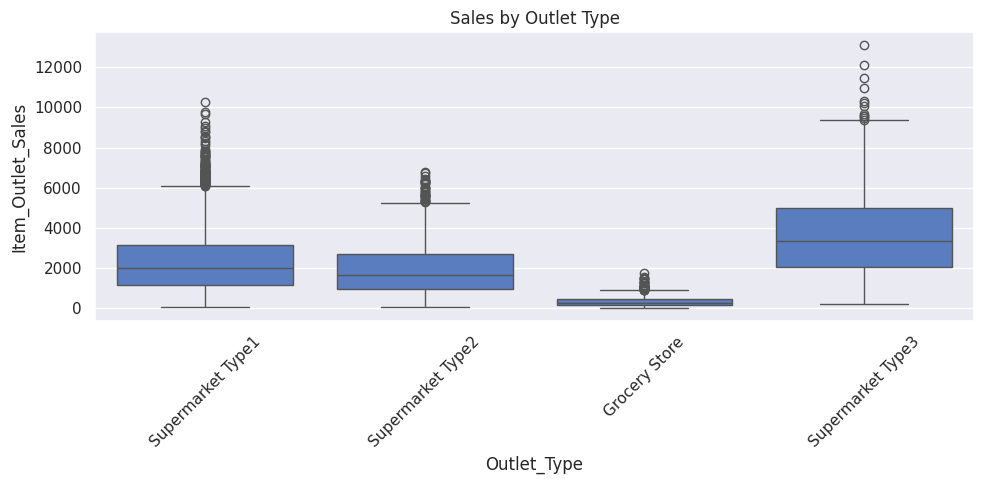

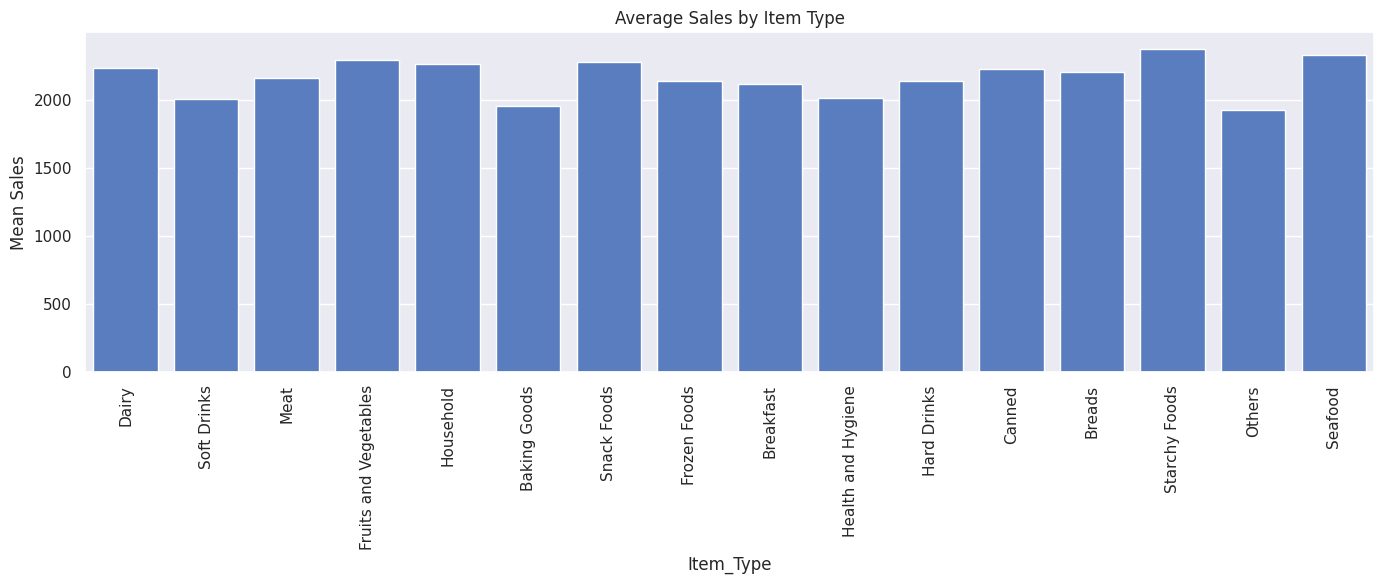

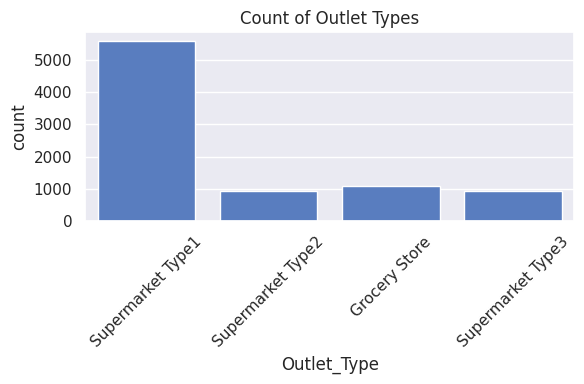

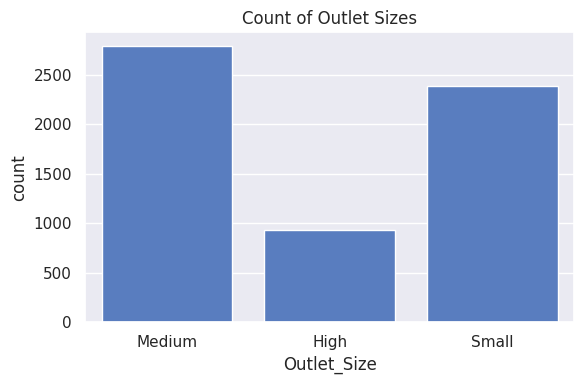

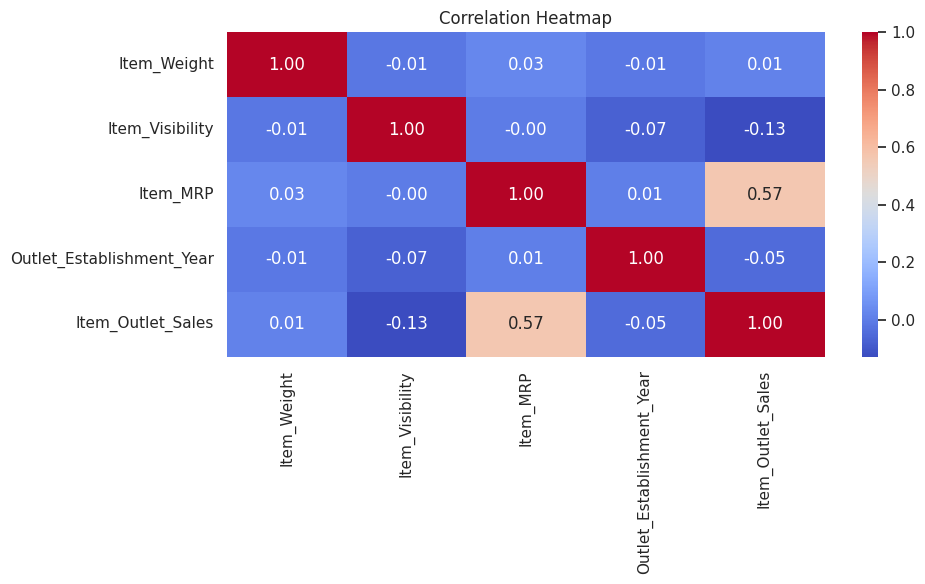

In [ ]:
# Distribution of Item_Outlet_Sales
plt.figure(figsize=(8, 4))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Distribution of Item_Outlet_Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show(); print()

# Sales by Outlet Type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title("Sales by Outlet Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(); print()

# Average Sales by Item Type
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales', estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title("Average Sales by Item Type")
plt.ylabel("Mean Sales")
plt.tight_layout()
plt.show(); print()

# Count plot of Outlet_Type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outlet_Type')
plt.title("Count of Outlet Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(); print()

# Count plot of Outlet_Size
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outlet_Size')
plt.title("Count of Outlet Sizes")
plt.tight_layout()
plt.show(); print()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show(); print()


## 5. Data Cleaning and Custom Preprocessing Pipeline

A custom `DataProcessor` class is defined using `BaseEstimator` and `TransformerMixin` to handle the complete preprocessing pipeline.

Key preprocessing steps include:
- Imputing missing values for `Item_Weight` and `Outlet_Size`
- Replacing zero `Item_Visibility` with the median
- Normalizing and one-hot encoding `Item_Fat_Content`
- Outlier capping using z-score thresholds
- Applying Yeo-Johnson transformation and feature scaling
- Encoding categorical features using One-Hot and Ordinal Encoding
- Leave-One-Out (LOO) encoding for high-cardinality features
- Feature engineering:
  - `Outlet_Age`
  - `Visibility_Percentage`
  - `Price_Per_Weight`
  - `Visibility_to_MRP_Ratio`
  - `Discount_Potential`
- Removing unnecessary columns like `Item_Identifier` and `Outlet_Establishment_Year`

This ensures that the dataset is well-cleaned and fully prepared for machine learning models.


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataProcessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()
        self.standard_scaler = StandardScaler()
        self.yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True)
        self.one_hot_encoder = None
        self.ordinal_encoder = None
        self.loo_encodings = {}
        self.median_visibility = None
        self.item_weight_medians = {}
        self.outlet_size_modes = {}

    def fit(self, X, y=None):
        # Median Item_Weight per Item_Type
        self.item_weight_medians = X.groupby('Item_Type')['Item_Weight'].median().to_dict()

        # Mode Outlet_Size per Outlet_Type
        self.outlet_size_modes = X.groupby('Outlet_Type')['Outlet_Size'].agg(
            lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'
        ).to_dict()

        # Replace zero visibility with median
        non_zero_visibility = X.loc[X['Item_Visibility'] > 0, 'Item_Visibility']
        self.median_visibility = non_zero_visibility.median()

        # Fit scalers
        self.scaler.fit(X[['Item_MRP']])
        self.standard_scaler.fit(X[['Item_Weight', 'Item_Visibility']])
        self.yeo_johnson.fit(X[['Item_Weight', 'Item_Visibility', 'Item_MRP']])

        # One-hot encoder
        self.one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self.one_hot_encoder.fit(X[['Outlet_Type']])

        # Ordinal encoder
        self.ordinal_encoder = OrdinalEncoder(categories=[
            ['Small', 'Medium', 'High'],
            ['Tier 3', 'Tier 2', 'Tier 1']
        ], handle_unknown='use_encoded_value', unknown_value=-1)
        self.ordinal_encoder.fit(X[['Outlet_Size', 'Outlet_Location_Type']])

        # LOO encoding for high-cardinality features
        if y is not None:
            y = pd.Series(y, index=X.index)
            high_cardinality_features = ['Item_Identifier', 'Outlet_Identifier']
            for feature in high_cardinality_features:
                loo_encoding = X[feature].map(lambda x: y[X[feature] == x].mean()).to_dict()
                self.loo_encodings[feature] = loo_encoding

        return self

    def transform(self, X, y=None):
        X = X.copy()

        # Check essential columns
        required_columns = ['Item_Type', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
                            'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']
        for col in required_columns:
            if col not in X.columns:
                raise KeyError(f"Missing required column: {col}")

        # Impute missing values
        X['Item_Weight'] = X['Item_Weight'].fillna(X['Item_Type'].map(self.item_weight_medians))
        X['Outlet_Size'] = X['Outlet_Size'].fillna(X['Outlet_Type'].map(self.outlet_size_modes))
        X['Item_Visibility'] = X['Item_Visibility'].replace(0, self.median_visibility)

        # Normalize Item_Fat_Content
        X['Item_Fat_Content'] = X['Item_Fat_Content'].str.strip().str.lower()
        fat_map = {'low fat': 'Low Fat', 'lf': 'Low Fat', 'reg': 'Regular', 'regular': 'Regular'}
        X['Item_Fat_Content'] = X['Item_Fat_Content'].map(fat_map)

        # One-hot encode Fat_Content
        fat_ohe = pd.get_dummies(X['Item_Fat_Content'], prefix='Item_Fat_Content')
        X = pd.concat([X.drop(columns=['Item_Fat_Content']), fat_ohe], axis=1)

        # Cap outliers
        for col in ['Item_Weight', 'Item_Visibility', 'Item_MRP']:
            mean, std = X[col].mean(), X[col].std()
            upper = mean + 3 * std
            lower = mean - 3 * std
            X[col] = np.clip(X[col], lower, upper)

        # Apply transformations
        skewed_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
        X[skewed_cols] = self.yeo_johnson.transform(X[skewed_cols])
        X[['Item_Weight', 'Item_Visibility']] = self.standard_scaler.transform(X[['Item_Weight', 'Item_Visibility']])
        X[['Item_MRP']] = self.scaler.transform(X[['Item_MRP']])

        # One-hot encode Outlet_Type
        outlet_type_encoded = self.one_hot_encoder.transform(X[['Outlet_Type']])
        outlet_type_df = pd.DataFrame(outlet_type_encoded, columns=self.one_hot_encoder.get_feature_names_out(['Outlet_Type']), index=X.index)
        X = pd.concat([X.drop(columns=['Outlet_Type']), outlet_type_df], axis=1)

        # Ordinal encode Outlet_Size and Location
        X[['Outlet_Size', 'Outlet_Location_Type']] = self.ordinal_encoder.transform(
            X[['Outlet_Size', 'Outlet_Location_Type']]
        )

        # One-hot encode Item_Type
        item_type_ohe = pd.get_dummies(X['Item_Type'], prefix='Item_Type')
        X = pd.concat([X.drop(columns=['Item_Type']), item_type_ohe], axis=1)

        # LOO encoding
        for feature in ['Outlet_Identifier']:
            if feature in X.columns:
                X[f"{feature}_LOO"] = X[feature].map(self.loo_encodings.get(feature, {})).fillna(0.0)
        X.drop(columns=['Outlet_Identifier'], inplace=True)

        # Feature engineering
        X['Outlet_Age'] = 2024 - X['Outlet_Establishment_Year']
        X['Visibility_Percentage'] = X['Item_Visibility'] / (X['Item_Visibility'].sum() + 1e-5)
        X['Price_Per_Weight'] = X['Item_MRP'] / (X['Item_Weight'] + 1e-5)
        X['Visibility_to_MRP_Ratio'] = X['Item_Visibility'] / (X['Item_MRP'] + 1e-5)
        X['Discount_Potential'] = X['Item_MRP'] / (X['Item_Visibility'] + 1e-5)

        # Final cleanup
        X.columns = X.columns.str.replace(' ', '_')
        X.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'], inplace=True)

        return X

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)


## 6. Splitting Data and Applying Custom Preprocessing

- Define the target variable (`Item_Outlet_Sales`)
- Split the dataset into training and testing sets
- Apply the custom `DataProcessor` transformer to clean, encode, scale, and engineer features
- Ensure no missing values remain after preprocessing


In [ ]:
# Define target and split
target_variable = 'Item_Outlet_Sales'
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit processor
processor = DataProcessor()
X_train = processor.fit_transform(X_train, y_train)
X_test = processor.transform(X_test)

# Confirm no missing values
print("Missing values in training set:")
print(X_train.isnull().sum().sum())

print("\nMissing values in testing set:")
print(X_test.isnull().sum().sum())

print("\nTraining feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print(X_train.columns.tolist())


Missing values in training set:
0

Missing values in testing set:
0

Training feature shape: (6818, 33)
Testing feature shape: (1705, 33)
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Fat_Content_Low_Fat', 'Item_Fat_Content_Regular', 'Outlet_Type_Grocery_Store', 'Outlet_Type_Supermarket_Type1', 'Outlet_Type_Supermarket_Type2', 'Outlet_Type_Supermarket_Type3', 'Item_Type_Baking_Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen_Foods', 'Item_Type_Fruits_and_Vegetables', 'Item_Type_Hard_Drinks', 'Item_Type_Health_and_Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack_Foods', 'Item_Type_Soft_Drinks', 'Item_Type_Starchy_Foods', 'Outlet_Identifier_LOO', 'Outlet_Age', 'Visibility_Percentage', 'Price_Per_Weight', 'Visibility_to_MRP_Ratio', 'Discount_Potential']


## 7. Training and Evaluating Multiple Regression Models

Training and evaluating five different regression models:

- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor
- MLP Regressor (Neural Network)

Each model is trained on the processed training set and evaluated using R² score on both training and test data.
Results are stored in a DataFrame for comparison.


In [ ]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, verbosity=0),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                                   max_iter=1000, random_state=42)
}

# Store results
r2_scores = {'Model': [], 'Training R²': [], 'Testing R²': []}

# Train and evaluate
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Use .to_numpy() for XGBoost
    if model_name == 'XGBoost':
        X_train_data, X_test_data = X_train.to_numpy(), X_test.to_numpy()
    else:
        X_train_data, X_test_data = X_train, X_test

    model.fit(X_train_data, y_train)

    train_preds = model.predict(X_train_data)
    test_preds = model.predict(X_test_data)

    r2_scores['Model'].append(model_name)
    r2_scores['Training R²'].append(r2_score(y_train, train_preds))
    r2_scores['Testing R²'].append(r2_score(y_test, test_preds))

# Show scores
r2_scores_df = pd.DataFrame(r2_scores)
print("\nModel Performance (R² Scores):")
print(r2_scores_df)


Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training MLP Regressor...

Model Performance (R² Scores):
               Model  Training R²  Testing R²
0  Linear Regression     0.561554    0.577614
1      Random Forest     0.716076    0.604206
2  Gradient Boosting     0.667265    0.601874
3            XGBoost     0.811301    0.569124
4      MLP Regressor     0.521022    0.510415


## 8. Visual Comparison of Model Performance

Using a grouped bar chart to compare R² scores of different models on:

- Training dataset
- Testing dataset

This visualization helps to:
- Spot overfitting (high training R², low testing R²)
- Detect underfitting (low R² on both)
- Select the most generalizable model for deployment


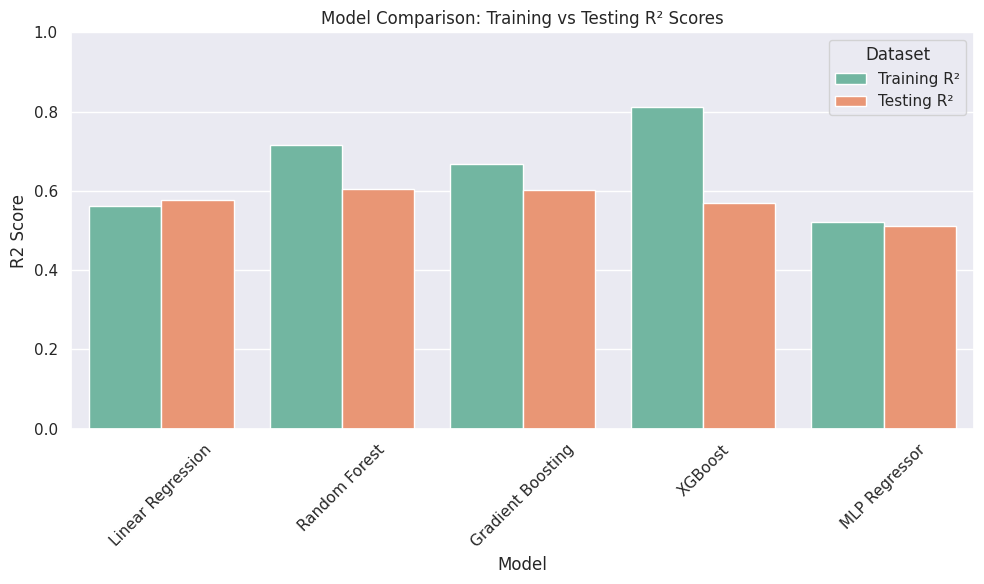

In [ ]:
# Set plot style
plt.figure(figsize=(10, 6))
r2_plot = r2_scores_df.melt(id_vars='Model', var_name='Dataset', value_name='R2 Score')

sns.barplot(data=r2_plot, x='Model', y='R2 Score', hue='Dataset', palette='Set2')
plt.title('Model Comparison: Training vs Testing R² Scores')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 9. Hyperparameter Tuning for XGBoost

To improve model performance and reduce underfitting or overfitting, we tune the XGBoost model using `RandomizedSearchCV` with a defined parameter grid.

- Tried 50 random combinations across:
  - Number of estimators
  - Learning rate
  - Maximum tree depth
  - Subsampling ratios
  - Regularization parameters

Evaluation is done using 5-fold cross-validation and R² score as the metric.

After tuning:
- The best model is selected
- Performance is measured again on both training and testing datasets


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 1, 5],
    'reg_lambda': [1, 5, 10],
}

# Initialize base model
xgb = XGBRegressor(random_state=42, verbosity=0)

# Perform randomized search
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=50,  # number of combinations to try
    scoring='r2',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

print("Tuning XGBoost using RandomizedSearchCV...")
xgb_search.fit(X_train, y_train)

# Best model from tuning
best_xgb = xgb_search.best_estimator_

# Print best parameters and cross-validated score
print("Best Parameters for XGBoost:")
print(xgb_search.best_params_)

print(f"\nBest CV R² Score: {xgb_search.best_score_:.4f}")

# Evaluate the tuned model on train and test sets
xgb_train_r2 = best_xgb.score(X_train, y_train)
xgb_test_r2 = best_xgb.score(X_test, y_test)

print(f"\nXGBoost Training R²: {xgb_train_r2:.4f}")
print(f"XGBoost Testing R²: {xgb_test_r2:.4f}")


Tuning XGBoost using RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters for XGBoost:
{'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 5, 'colsample_bytree': 0.8}

Best CV R² Score: 0.5969

XGBoost Training R²: 0.6256
XGBoost Testing R²: 0.6161


## 10. Retraining XGBoost with Best Parameters

Using the best parameters obtained from hyperparameter tuning, we retrain the XGBoost model on the training data.

- This ensures the model leverages optimal settings.
- We convert the DataFrames to NumPy arrays to ensure compatibility with XGBoost.
- Finally, we evaluate the model's performance again using R² scores.


In [ ]:
# Extract best parameters from RandomizedSearchCV
best_params = xgb_search.best_params_
best_params.update({'random_state': 42, 'verbosity': 0})

# Retrain XGBRegressor on training data with best params
final_xgb = XGBRegressor(**best_params)

# Use NumPy arrays for XGBoost
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test_np = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

print("Retraining XGBoost with best parameters...")
final_xgb.fit(X_train_np, y_train_np)

# Evaluate retrained model
train_r2 = final_xgb.score(X_train_np, y_train_np)
test_r2 = final_xgb.score(X_test_np, y_test_np)

print(f"Final XGBoost Training R²: {train_r2:.4f}")
print(f"Final XGBoost Testing R²: {test_r2:.4f}")


Retraining XGBoost with best parameters...
Final XGBoost Training R²: 0.6256
Final XGBoost Testing R²: 0.6161


## 11. Saving Preprocessing Pipelines and Final Model

We save all the fitted preprocessing components and the final tuned XGBoost model into a `./models/` directory using `joblib` and `pickle`.

This step is crucial for deployment, allowing us to:
- Reuse the same transformations on incoming data.
- Load the trained model for inference without retraining.

Saved components include:
- Scalers
- Encoders
- Custom mappings
- Final trained model


In [ ]:
import os
import pickle
from joblib import dump

# Set models folder
save_dir = "./models/"
os.makedirs(save_dir, exist_ok=True)

# Save preprocessing components with renamed filenames
dump(processor.scaler, save_dir + 'minmax_scaler.pkl')
dump(processor.standard_scaler, save_dir + 'zscore_standard_scaler.pkl')
dump(processor.yeo_johnson, save_dir + 'yeo_johnson_power_transformer.pkl')
dump(processor.one_hot_encoder, save_dir + 'one_hot_encoder_outlet_type.pkl')
dump(processor.ordinal_encoder, save_dir + 'ordinal_encoder_outlet_info.pkl')
dump(processor.loo_encodings, save_dir + 'loo_encodings_mapping.pkl')
dump(processor.item_weight_medians, save_dir + 'item_weight_medians_map.pkl')
dump(processor.outlet_size_modes, save_dir + 'outlet_size_modes_map.pkl')
dump(processor.median_visibility, save_dir + 'median_visibility_value.pkl')

# Save final XGBoost model with new filename
with open(save_dir + 'xgboost_sales_model.pkl', 'wb') as f:
    pickle.dump(final_xgb, f)

print("All .pkl files saved to ./models/ with unique and clear filenames.")


All .pkl files saved to ./models/ with unique and clear filenames.


## 12. Verifying Saved `.pkl` Files

We list the contents of the `./models/` directory to ensure that all necessary model and preprocessing artifacts have been saved correctly.


In [ ]:
import os

# List all files in ./models/
print("Saved .pkl files:")
for file in os.listdir("./models/"):
    print(file)


Saved .pkl files:
median_visibility_value.pkl
loo_encodings_mapping.pkl
xgboost_sales_model.pkl
item_weight_medians_map.pkl
yeo_johnson_power_transformer.pkl
ordinal_encoder_outlet_info.pkl
zscore_standard_scaler.pkl
minmax_scaler.pkl
outlet_size_modes_map.pkl
one_hot_encoder_outlet_type.pkl


## 13. Downloading `.pkl` Files from Google Colab

This cell downloads all model and preprocessing `.pkl` files from the `./models/` directory to your local system.


In [ ]:
from google.colab import files
import glob

for file in glob.glob('./models/*.pkl'):
    files.download(file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>